# Aprendizado de Máquina 1 - ENPE 3
Trabalho 2  
Prof. Dr. Diego Furtado da Silva

Hemilyn Stephanye Aguiar Porfirio

# Importações

In [2]:
pip install dython


In [3]:
pip install researchpy

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import researchpy as rp
import matplotlib.pyplot as plt
import copy
import math
from collections import Counter
import scipy.stats as ss
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from sklearn.external.six import StringIO  
from IPython.display import Image  
import pydotplus

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="whitegrid")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
atributos_colunas =['target','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
missing_value= '?' 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=None, names= atributos_colunas, index_col=False, na_values = missing_value)

nlin, ncol= df.shape

df.head()


,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# Análise Exploratória de Dados




In [6]:
#--------------------------------------------------------------------------------------------------------------
# INFORMAÇÃO GERAL DO DATASET
#--------------------------------------------------------------------------------------------------------------
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   target                    8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Index(['target', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
#--------------------------------------------------------------------------------------------------------------
# FREQUÊNCIA
#--------------------------------------------------------------------------------------------------------------
rp.summary_cat(df) 

,Variable,Outcome,Count,Percent
0,target,e,4208,51.80
1,,p,3916,48.20
2,cap-shape,x,3656,45.00
3,,f,3152,38.80
4,,k,828,10.19
...,...,...,...,...
113,,p,1144,14.08
114,,l,832,10.24
115,,u,368,4.53
116,,m,292,3.59


In [8]:
#--------------------------------------------------------------------------------------------------------------
# VALORES FALTANTES
#--------------------------------------------------------------------------------------------------------------
ds_cat_stats = pd.DataFrame(columns = ['column','num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in df.columns:
    tmp['column'] = [c]
    tmp['values'] = [df[c].unique()]
    #tmp['values_count_incna'] = len(list(df[c].unique()))
    #tmp['values_count_nona'] = int(df[c].nunique())
    tmp['num_miss'] = df[c].isnull().sum()
    tmp['pct_miss'] = (df[c].isnull().sum()/ len(df)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats



,column,num_miss,pct_miss,values
0,target,0,0.0,"[p, e]"
0,cap-shape,0,0.0,"[x, b, s, f, k, c]"
0,cap-surface,0,0.0,"[s, y, f, g]"
0,cap-color,0,0.0,"[n, y, w, g, e, p, b, u, c, r]"
0,bruises,0,0.0,"[t, f]"
0,odor,0,0.0,"[p, a, l, n, f, c, y, s, m]"
0,gill-attachment,0,0.0,"[f, a]"
0,gill-spacing,0,0.0,"[c, w]"
0,gill-size,0,0.0,"[n, b]"
0,gill-color,0,0.0,"[k, n, g, p, w, h, u, e, b, r, y, o]"


In [9]:
#--------------------------------------------------------------------------------------------------------------
# OBSERVACÕES DUPLICADAS
#--------------------------------------------------------------------------------------------------------------
df.duplicated().value_counts()

False    8124
dtype: int64

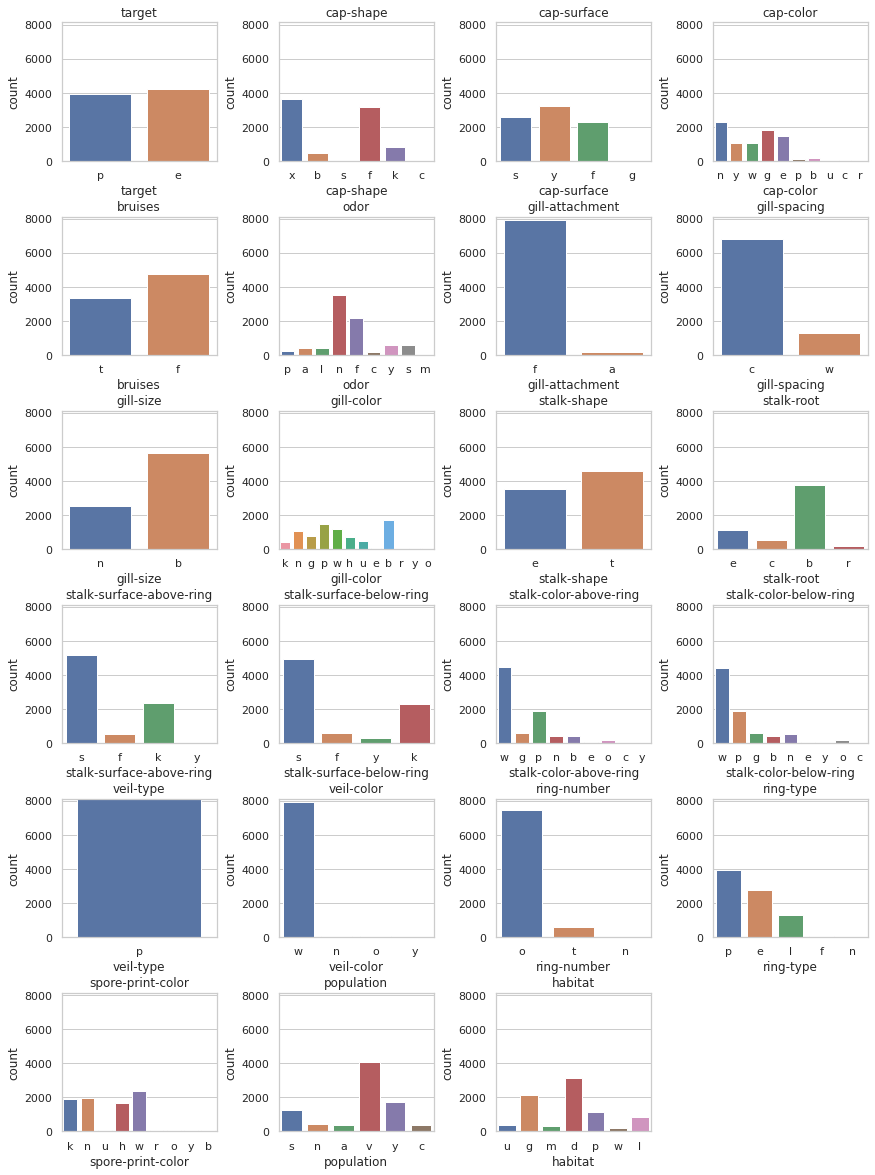

In [10]:
#--------------------------------------------------------------------------------------------------------------
# PLOT FREQUÊNCIA
#--------------------------------------------------------------------------------------------------------------

a = 6 
b = 4 
c = 1 

fig = plt.figure(figsize=(14,14))
for i in atributos_colunas:
    ax= plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    ax.set_ylim(0,len(df))
    sns.countplot(df[i])
    c = c + 1

plt.subplots_adjust(left=0.1,bottom=0.9, right=0.9,top=2, wspace=0.4, hspace=0.4)
plt.show()

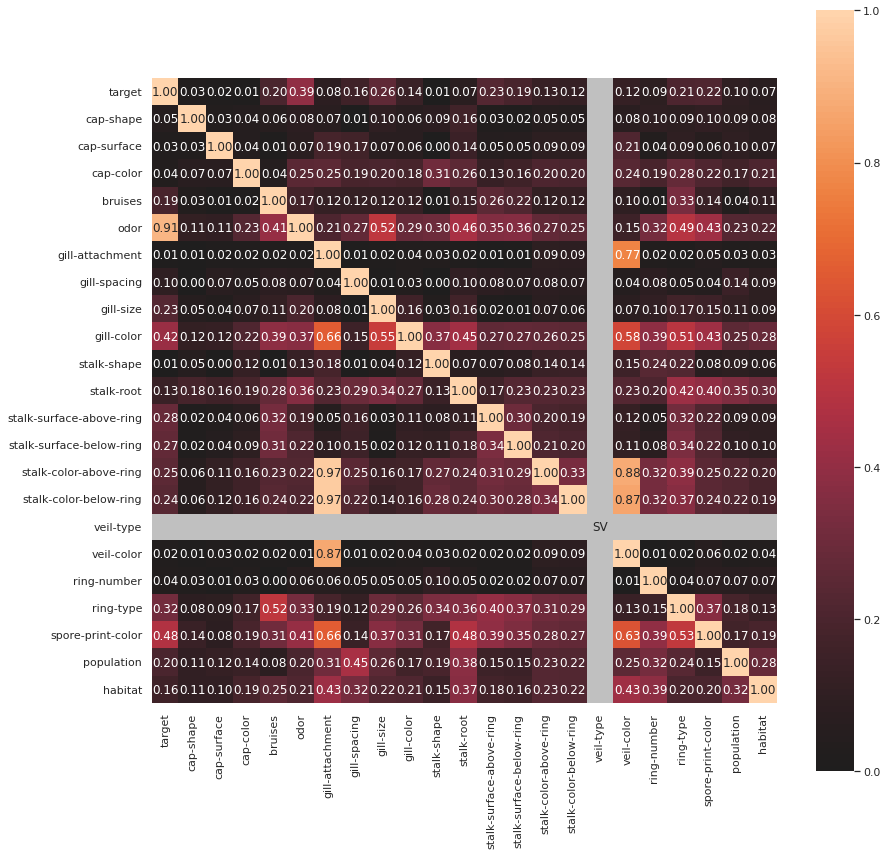

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f96d3634fd0>,
 'corr':                             target  cap-shape  ...  population   habitat
 target                    1.000000   0.029522  ...    0.100808  0.068946
 cap-shape                 0.048842   1.000000  ...    0.090186  0.076914
 cap-surface               0.028617   0.030204  ...    0.097547  0.070899
 cap-color                 0.036083   0.067283  ...    0.171243  0.206435
 bruises                   0.192559   0.033847  ...    0.038606  0.108533
 odor                      0.906920   0.112945  ...    0.228852  0.219026
 gill-attachment           0.014178   0.007299  ...    0.026963  0.032364
 gill-spacing              0.100977   0.002815  ...    0.144702  0.090146
 gill-size                 0.230369   0.053098  ...    0.114321  0.088057
 gill-color                0.417367   0.116157  ...    0.254277  0.282748
 stalk-shape               0.007524   0.050885  ...    0.093624  0.063570
 stalk-root                0.134943   

In [11]:
#--------------------------------------------------------------------------------------------------------------
# MATRIX DE ASSOCIAÇÃO
#--------------------------------------------------------------------------------------------------------------

from dython.nominal import associations
associations(df,nom_nom_assoc='theil', figsize= (14,14))


target     e     p
odor              
a        400     0
c          0   192
f          0  2160
l        400     0
m          0    36
n       3408   120
p          0   256
s          0   576
y          0   576


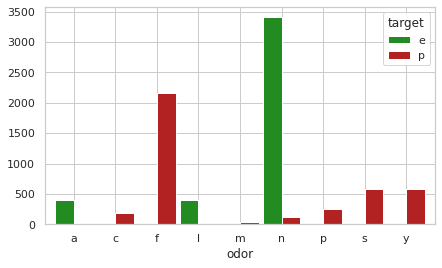

In [12]:
#--------------------------------------------------------------------------------------------------------------
# VARIÁVEL ODOR
#--------------------------------------------------------------------------------------------------------------
CrosstabResult=pd.crosstab(index=df['odor'],columns=df['target'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4),rot=0, color=['forestgreen', 'firebrick'], width=0.9)



target                e     p
spore-print-color            
b                    48     0
h                    48  1584
k                  1648   224
n                  1744   224
o                    48     0
r                     0    72
u                    48     0
w                   576  1812
y                    48     0


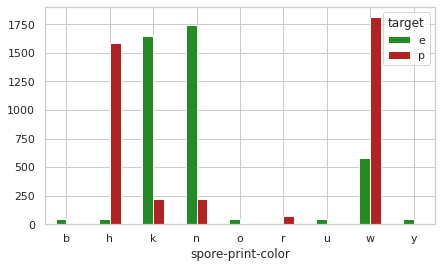

In [13]:
#--------------------------------------------------------------------------------------------------------------
# VARIÁVEL SPORE-PRINT-COLOR
#--------------------------------------------------------------------------------------------------------------
CrosstabResult=pd.crosstab(index=df['spore-print-color'],columns=df['target'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0, color=['forestgreen', 'firebrick'])

target        e     p
gill-color           
b             0  1728
e            96     0
g           248   504
h           204   528
k           344    64
n           936   112
o            64     0
p           852   640
r             0    24
u           444    48
w           956   246
y            64    22


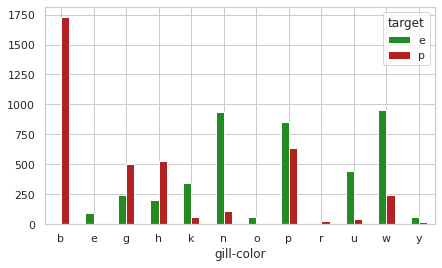

In [14]:
#--------------------------------------------------------------------------------------------------------------
# VARIÁVEL GILL-COLLOR
#--------------------------------------------------------------------------------------------------------------
CrosstabResult=pd.crosstab(index=df['gill-color'],columns=df['target'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0, color=['forestgreen', 'firebrick'])

# Pre processamento


In [15]:
#--------------------------------------------------------------------------------------------------------------
# DROPAR VEIL TYPE
#--------------------------------------------------------------------------------------------------------------
df = df.drop('veil-type', 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   target                    8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Aprendizado

In [16]:
df_copy= df.copy()
#df_copy = (df.drop(['target'],axis=1)).copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   target                    8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [17]:
df_copy_onehot = pd.get_dummies(df_copy)
df_copy_onehot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, target_e to habitat_w
dtypes: uint8(117)
memory usage: 928.4 KB


In [18]:
pip install kmodes


In [19]:
from kmodes.kmodes import KModes

## Cao

In [20]:
#--------------------------------------------------------------------------------------------------------------
# EXECUÇÃO 
#--------------------------------------------------------------------------------------------------------------
km_cao = KModes(n_clusters=4, init='Cao', n_init=1, verbose=1)
km_cao_fit = km_cao.fit_predict(df_copy_onehot)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 327, cost: 94748.0
Run 1, iteration: 2/100, moves: 129, cost: 94736.0
Run 1, iteration: 3/100, moves: 4, cost: 94736.0


In [21]:
#--------------------------------------------------------------------------------------------------------------
# MODE
#--------------------------------------------------------------------------------------------------------------
km_cao_clustersDf= pd.DataFrame(km_cao.cluster_centroids_)
km_cao_clustersDf.columns = df_copy_onehot.columns
km_cao_clustersDf

,target_e,target_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,...,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [22]:
#--------------------------------------------------------------------------------------------------------------
# COLUNAS APENAS COM 0
#--------------------------------------------------------------------------------------------------------------
km_cao_clustersDf= pd.DataFrame(km_cao.cluster_centroids_)
km_cao_clustersDf.columns = df_copy_onehot.columns
km_cao_clustersDf.loc[:,(km_cao_clustersDf !=0).any(axis=0)]

,target_e,target_p,cap-surface_s,cap-surface_y,bruises_f,bruises_t,odor_f,odor_n,gill-attachment_f,gill-spacing_c,gill-size_b,gill-size_n,gill-color_b,gill-color_w,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-color-above-ring_w,stalk-color-below-ring_w,veil-color_w,ring-number_o,ring-type_e,ring-type_l,ring-type_p,spore-print-color_h,spore-print-color_w,population_v,habitat_d
0,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,1,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1
2,0,1,0,1,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0
3,0,1,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0


## Huang

In [23]:
km_huang = KModes(n_clusters=4, init= "Huang", n_init = 1, verbose= 1)
km_huang_fit = km_huang.fit_predict(df_copy_onehot)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3121, cost: 94490.0
Run 1, iteration: 2/100, moves: 350, cost: 94317.0
Run 1, iteration: 3/100, moves: 2, cost: 94317.0


In [24]:
#--------------------------------------------------------------------------------------------------------------
# MODE
#--------------------------------------------------------------------------------------------------------------
km_huang_clustersDf= pd.DataFrame(km_huang.cluster_centroids_)
km_huang_clustersDf.columns = df_copy_onehot.columns
km_huang_clustersDf

,target_e,target_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,...,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#--------------------------------------------------------------------------------------------------------------
# COLUNAS SEM 0
#--------------------------------------------------------------------------------------------------------------

km_huang_clustersDf.loc[:,(km_cao_clustersDf !=0).any(axis=0)]

,target_e,target_p,cap-surface_s,cap-surface_y,bruises_f,bruises_t,odor_f,odor_n,gill-attachment_f,gill-spacing_c,gill-size_b,gill-size_n,gill-color_b,gill-color_w,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-color-above-ring_w,stalk-color-below-ring_w,veil-color_w,ring-number_o,ring-type_e,ring-type_l,ring-type_p,spore-print-color_h,spore-print-color_w,population_v,habitat_d
0,0,1,0,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,1
3,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,0


## Escolhendo o melhor K

In [26]:
#--------------------------------------------------------------------------------------------------------------
# CÁLCULO DO CUSTO
#--------------------------------------------------------------------------------------------------------------

cost = []
k = range(1,6)
for num_clusters in k:
    print(f"\nCluster: {num_clusters}")
    km = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    km.fit_predict(df_copy_onehot)
    cost.append(km.cost_)




Cluster: 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 137188.0

Cluster: 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2085, cost: 113300.0
Run 1, iteration: 2/100, moves: 19, cost: 113300.0

Cluster: 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1755, cost: 96120.0
Run 1, iteration: 2/100, moves: 53, cost: 96120.0

Cluster: 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 327, cost: 94748.0
Run 1, iteration: 2/100, moves: 129, cost: 94736.0
Run 1, iteration: 3/100, moves: 4, cost: 94736.0

Cluster: 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 706, cost: 86956.0
Run 1, iteration: 2/100, moves: 267, cost: 86760.0
Run 1, iteration: 3/100, moves:

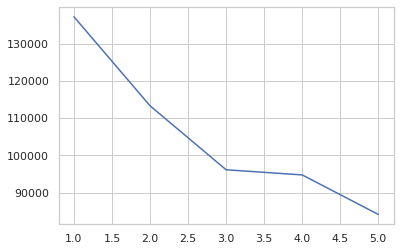

In [27]:
y = np.array([i for i in k])
plt.plot(y,cost)

## Novo K

In [28]:
#--------------------------------------------------------------------------------------------------------------
# EXECUÇÃO COM O NOVO K
#--------------------------------------------------------------------------------------------------------------
km_cao = KModes(n_clusters=3, init='Cao', n_init=1, verbose=1)
km_cao_fit = km_cao.fit_predict(df_copy_onehot)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1755, cost: 96120.0
Run 1, iteration: 2/100, moves: 53, cost: 96120.0


# Análise Resultados

In [29]:
#--------------------------------------------------------------------------------------------------------------
# CLUSTERS
#--------------------------------------------------------------------------------------------------------------

km_cao_clustersDf= pd.DataFrame(km_cao.cluster_centroids_)
km_cao_clustersDf.columns = df_copy_onehot.columns
km_cao_clustersDf.loc[:,(km_cao_clustersDf !=0).any(axis=0)]

,target_e,target_p,cap-surface_y,bruises_f,bruises_t,odor_f,odor_n,gill-attachment_f,gill-spacing_c,gill-size_b,gill-size_n,gill-color_b,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-color-above-ring_w,stalk-color-below-ring_w,veil-color_w,ring-number_o,ring-type_e,ring-type_l,ring-type_p,spore-print-color_h,spore-print-color_w,population_v
0,1,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0
1,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1
2,0,1,1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0,0


In [30]:
#--------------------------------------------------------------------------------------------------------------
# COMBINAÇÃO DOS CLUSTERS COM O CONJUNTO DE DADOS
#--------------------------------------------------------------------------------------------------------------

clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clustersDf = pd.DataFrame(km_cao_fit)
clustersDf.columns= ['cluster']
df_combinado = pd.concat([df,clustersDf], axis=1).reset_index()
df_combinado = df_combinado.drop(['index'], axis=1)
df_combinado.head(20)

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cluster
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u,0
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u,0
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g,0
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,w,o,p,k,n,g,0
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,w,o,p,k,n,m,0
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,s,m,0
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,w,o,p,k,v,g,0
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,w,o,p,k,s,m,0


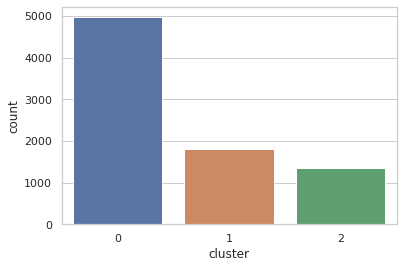

In [31]:
#--------------------------------------------------------------------------------------------------------------
# QUANTIDADE OBSERVAÇÕES EM CADA CLUSTER
#--------------------------------------------------------------------------------------------------------------

sns.countplot(df_combinado["cluster"])

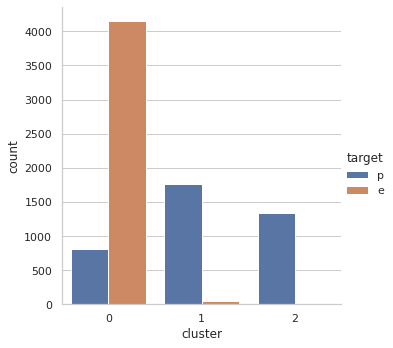

In [32]:
#--------------------------------------------------------------------------------------------------------------
# CLUSTERS X ATRIBUTO CLASSIFICAÇÃO 
#--------------------------------------------------------------------------------------------------------------

#df_combinado['cluster'].value_counts()
sns.catplot(data=df_combinado, x="cluster", kind="count",hue="target")
plt.show()

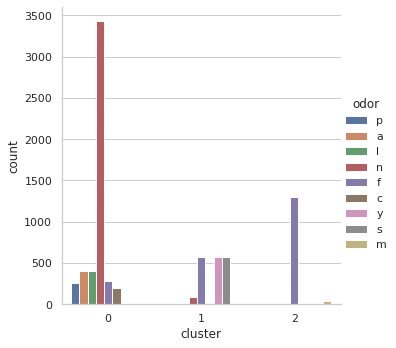

In [33]:
#--------------------------------------------------------------------------------------------------------------
# CLUSTERS X ATRIBUTO ODOR
#--------------------------------------------------------------------------------------------------------------

#df_combinado['cluster'].value_counts()
sns.catplot(data=df_combinado, x="cluster", kind="count",hue="odor")
plt.show()